In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-indices-dataset/INDIAVIX.csv
/kaggle/input/nifty-indices-dataset/NIFTY BANK.csv
/kaggle/input/nifty-indices-dataset/NIFTY AUTO.csv
/kaggle/input/nifty-indices-dataset/NIFTY 50.csv
/kaggle/input/nifty-indices-dataset/NIFTY PHARMA.csv
/kaggle/input/nifty-indices-dataset/NIFTY FMCG.csv
/kaggle/input/nifty-indices-dataset/NIFTY MIDCAP 150.csv
/kaggle/input/nifty-indices-dataset/NIFTY NEXT 50.csv
/kaggle/input/nifty-indices-dataset/NIFTY IT.csv
/kaggle/input/nifty-indices-dataset/NIFTY SMALLCAP 250.csv
/kaggle/input/nifty-indices-dataset/NIFTY METAL.csv
/kaggle/input/nifty-indices-dataset/NIFTY 500.csv
/kaggle/input/nifty-indices-dataset/NIFTY 100.csv


In [2]:
df=pd.read_csv('../input/nifty-indices-dataset/INDIAVIX.csv')
df.head()

,Date,Open,High,Low,Close,Previous,Change,%Change
0,2009-03-02,43.19,43.38,41.44,43.17,NaN,0.00,0.0000
1,2009-03-03,43.17,43.90,41.20,43.89,43.17,0.72,0.0167
2,2009-03-04,43.89,43.89,42.16,42.52,43.89,-1.37,-0.0312
3,2009-03-05,42.52,42.71,40.41,41.49,42.52,-1.03,-0.0242
4,2009-03-06,41.49,41.49,37.57,38.16,41.49,-3.33,-0.0803


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3061 non-null   object 
 1   Open      3061 non-null   float64
 2   High      3061 non-null   float64
 3   Low       3061 non-null   float64
 4   Close     3061 non-null   float64
 5   Previous  3060 non-null   float64
 6   Change    3061 non-null   float64
 7   %Change   3061 non-null   float64
dtypes: float64(7), object(1)
memory usage: 191.4+ KB


In [4]:
#Some data cleaning
m=df['Previous'].median()
df['Previous']=df['Previous'].fillna(m)

In [5]:
df.head()

,Date,Open,High,Low,Close,Previous,Change,%Change
0,2009-03-02,43.19,43.38,41.44,43.17,17.87875,0.00,0.0000
1,2009-03-03,43.17,43.90,41.20,43.89,43.17000,0.72,0.0167
2,2009-03-04,43.89,43.89,42.16,42.52,43.89000,-1.37,-0.0312
3,2009-03-05,42.52,42.71,40.41,41.49,42.52000,-1.03,-0.0242
4,2009-03-06,41.49,41.49,37.57,38.16,41.49000,-3.33,-0.0803


In [6]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3061 non-null   datetime64[ns]
 1   Open      3061 non-null   float64       
 2   High      3061 non-null   float64       
 3   Low       3061 non-null   float64       
 4   Close     3061 non-null   float64       
 5   Previous  3061 non-null   float64       
 6   Change    3061 non-null   float64       
 7   %Change   3061 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 191.4 KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date', ylabel='Change'>

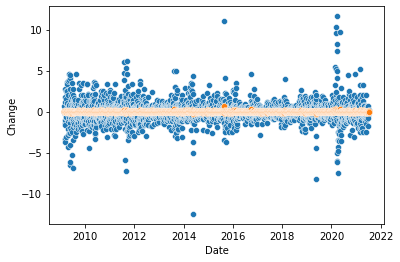

In [8]:
import seaborn as sns
sns.scatterplot(df['Date'],df['Change'])
sns.scatterplot(df['Date'],df['%Change'])
#The below diagram tells me about the volatility of the indices during 2016, 2020 and 2021
#Maybe because of covid-19

* sns.scatterplot(df['Date'],df['Change'])
* Decreasing trend of prices observed 
* There was a huge price spike shortly after 2020(Prob. because investors wanted to take advantage of volatility)
* There is also a cyclical process happening to the dataset

In [9]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import neighbors,metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from datetime import date

In [10]:
#x is date
#y is closing price

#Splitting up the data
x=df['Date']
y=df['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
#Setting up the model

model = svm.SVR()

#Ensure to reshape your data(becos if you don't there will be an error)

x_train=np.array(x_train)
x_train=x_train.reshape(-1,1)

y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)

y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)

x_test=np.array(x_test)
x_test=x_test.reshape(-1,1)

model.fit(x_train,y_train)
print(model)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()


In [12]:
#Looking at accuracy
predictions = model.predict(x_test)
accuracy=explained_variance_score(y_test, predictions)
print("predictions: ",predictions)
print('actual: ',y_test)
print('accuracy: ',accuracy)

predictions:  [29.44742265 13.74615293 18.26086513 15.9569807  26.54126623 17.71550947
 17.84420518 13.70477503 16.90796674 17.334476   31.32632161 15.97715502
 22.02885657 33.20311457 15.38598533 27.77896308 17.12756567 29.93691681
 15.20584006 26.19315595 14.36283659 31.92440248 25.5743726  21.78958346
 15.67602642 16.76924843 16.29108174 13.62716245 21.85027972 15.91889851
 13.67854625 15.0403843  16.82431631 17.34675152 17.317039   17.01912718
 15.98160189 22.25557671 14.53715877 24.05778031 14.33854772 18.22248521
 19.43990365 17.33769461 14.52615492 23.61981946 24.66172665 25.75192441
 18.02352614 14.44872044 24.10230048 24.86265261 18.45297043 20.85937623
 32.95888884 19.53035543 15.10354049 17.33869709 16.29307823 27.52166281
 19.14869999 17.33885819 24.04296899 20.13911773 14.19610777 15.90534028
 17.17375805 22.14812945 17.32050917 21.76322784 17.3176667  15.23459946
 15.64071985 19.49422942 25.4620874  17.31645972 17.32584812 18.77852072
 21.59121802 13.99280569 17.06678663 

In [13]:
#Let us now try to use random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=200,max_depth=3, random_state=0)
regr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(max_depth=3, n_estimators=200, random_state=0)

In [14]:
predictions=regr.predict(x_test)
accuracy=explained_variance_score(y_test, predictions)

In [15]:
print(f'predictions:{predictions}')
print(f'accuracy:{accuracy}')

predictions:[24.2503867  16.18005768 16.18005768 16.18005768 22.87936425 16.18005768
 16.18005768 16.18005768 16.18005768 16.18005768 44.99107354 16.18005768
 23.6691813  38.87866843 16.18005768 24.16876003 16.18005768 31.95178855
 16.18005768 22.87936425 16.18005768 46.29775824 22.87936425 22.87936425
 16.18005768 16.18005768 16.18005768 16.18005768 22.87936425 16.18005768
 16.18005768 16.18005768 16.18005768 16.18005768 16.18005768 16.18005768
 16.18005768 23.6691813  16.18005768 22.87936425 16.18005768 23.54855486
 23.85705357 16.18005768 16.18005768 22.87936425 22.87936425 22.87936425
 23.54855486 16.18005768 22.87936425 22.87936425 23.54855486 23.6691813
 38.87866843 23.54855486 16.18005768 16.18005768 16.18005768 24.16876003
 23.54855486 16.18005768 22.87936425 22.87936425 16.18005768 16.18005768
 16.18005768 23.6691813  16.18005768 23.6691813  16.18005768 16.18005768
 16.18005768 23.75660333 22.87936425 16.18005768 16.18005768 23.54855486
 23.6691813  16.18005768 16.18005768 22.

### This goes to show that random forest does a better job in making VIX predictions